In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics

In [4]:
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris["species"] = iris_data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [39]:
from sklearn.model_selection import train_test_split
X = iris.drop(columns=['species'])
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [45]:
pred_y = knn.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



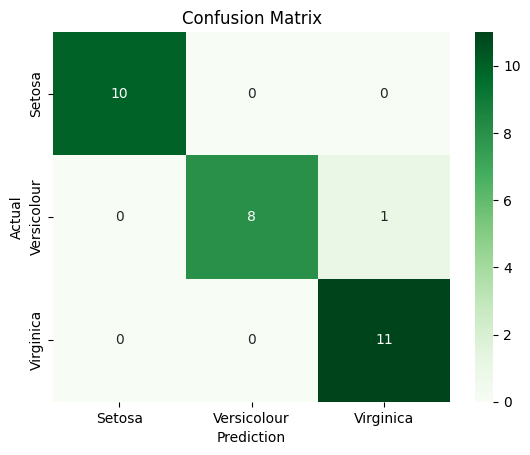

In [49]:
cm = confusion_matrix(y_test, pred_y)
sns.heatmap(cm, 
            annot=True,
            xticklabels=['Setosa','Versicolour', 'Virginica'],
            yticklabels=['Setosa','Versicolour', 'Virginica'],
            cmap="Greens")

plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')

plt.show()